In [8]:
import pandas as pd

https://scikit-learn.org/stable/modules/preprocessing.html

In [9]:
wine = pd.read_csv('../csv/wine.csv')

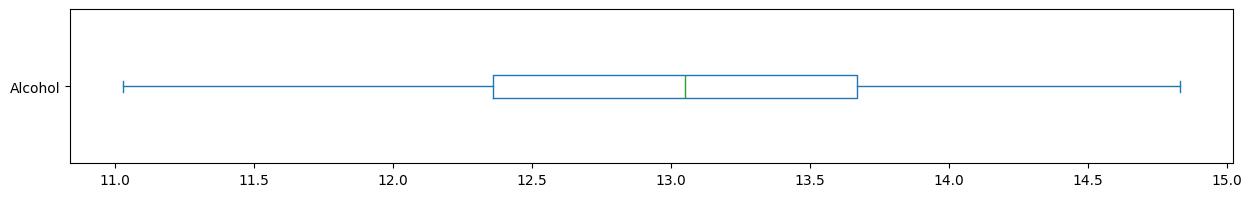

In [10]:
wine['Alcohol'].plot.box(vert=False, figsize=(15,2));

In [11]:
wine['Alcohol'].describe()

count    177.000000
mean      12.993672
std        0.808808
min       11.030000
25%       12.360000
50%       13.050000
75%       13.670000
max       14.830000
Name: Alcohol, dtype: float64

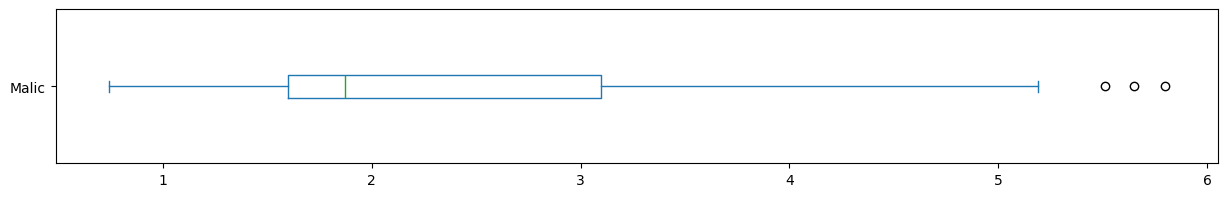

In [12]:
wine['Malic'].plot.box(vert=False, figsize=(15,2));

In [16]:
# pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler

In [19]:
minmax_scale = MinMaxScaler().fit(wine[['Alcohol', 'Malic']])
df_minmax = minmax_scale.transform(wine[['Alcohol', 'Malic']])

In [20]:
print('Valor mínimo depois de normalizar:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min()))

Valor mínimo depois de normalizar:
Alcohol=0.00, Malic acid=0.00


In [21]:
print('\nValor máximo depois de normalizar:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max()))


Valor máximo depois de normalizar:
Alcohol=1.00, Malic acid=1.00
